In [55]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload multiple files at once
uploaded = files.upload()

Saving immunizations (2).csv to immunizations (2) (2).csv
Saving patients (4).csv to patients (4) (2).csv


In [56]:
# Load datasets
df_patient = pd.read_csv("patients (4).csv")
df_immunization = pd.read_csv("immunizations (2).csv")

In [57]:
print(df_patient['STATE'].value_counts())

STATE
California    5674
Name: count, dtype: int64


In [58]:
# Ensuring Referential Integrity: Every Patient ID in immunization must exist in patient dataset
missing_patients = df_immunization[~df_immunization['PATIENT'].isin(df_patient['Id'])]

if missing_patients.empty:
    print("✅ Referential integrity is maintained.")
else:
    print("⚠️ Missing Patient_IDs in Patient table:", missing_patients['PATIENT'].unique())

✅ Referential integrity is maintained.


In [59]:
# Convert date columns to datetime format
df_patient['BIRTHDATE'] = pd.to_datetime(df_patient['BIRTHDATE'], errors='coerce')
df_patient['DEATHDATE'] = pd.to_datetime(df_patient['DEATHDATE'], errors='coerce')
df_immunization['DATE'] = pd.to_datetime(df_immunization['DATE'], errors='coerce')

In [60]:
# Check for invalid birthdates (Future dates)
invalid_birthdates = df_patient[df_patient['BIRTHDATE'] > pd.to_datetime('today')]
if not invalid_birthdates.empty:
    print(" Invalid birthdates found:", invalid_birthdates)

In [61]:
# Calculate Age (Handling both living and deceased patients)
current_date = pd.to_datetime('2025-02-09')  # Change to today's date
df_patient['Age'] = df_patient.apply(
    lambda row: (row['DEATHDATE'] - row['BIRTHDATE']).days // 365 if pd.notnull(row['DEATHDATE'])
    else (current_date - row['BIRTHDATE']).days // 365,
    axis=1
)
print(" Patient ages calculated successfully.")

 Patient ages calculated successfully.


In [62]:
# Define target vaccines as a set of exact string values
target_vaccines = {
    'Influenza  seasonal  injectable  preservative free',
    'COVID-19 vaccine  vector-nr  rS-Ad26  PF  0.5 mL',
    'Hib (PRP-OMP)',
    'MMR',
    'DTaP',
    'meningococcal MCV4P',
    "COVID-19 mRNA LNP-S PF 30 mcg/0.3 mL dose",
    "COVID-19 mRNA LNP-S PF 100 mcg/0.5mL dose or 50 mcg/0.25mL dose"
}

In [63]:
# Define target vaccines as a set of numeric values from your dataset
target_vaccines = {88, 118, 135, 140, 150, 155, 160, 165}


In [64]:
# Identify patients who have received at least one of the target vaccines
df_immunization['Vaccinated'] = df_immunization['CODE'].apply(lambda x: 'Yes' if x in target_vaccines else 'No')

In [65]:
# Display updated immunization table
print(df_immunization.head())


                       DATE                               PATIENT  \
0 2024-11-18 05:48:28+00:00  c6d2798d-4d1b-0502-cfef-0debc0025fd3   
1 2024-12-23 05:48:28+00:00  c6d2798d-4d1b-0502-cfef-0debc0025fd3   
2 2025-02-24 05:48:28+00:00  c6d2798d-4d1b-0502-cfef-0debc0025fd3   
3 2025-02-24 05:48:28+00:00  c6d2798d-4d1b-0502-cfef-0debc0025fd3   
4 2025-02-24 05:48:28+00:00  c6d2798d-4d1b-0502-cfef-0debc0025fd3   

                              ENCOUNTER  CODE                     DESCRIPTION  \
0  0eeb72f2-4b5b-2743-6dc3-7e9cb896b4cb     8  Hep B  adolescent or pediatric   
1  cd0c5137-b827-8054-749f-f49a85d2a519     8  Hep B  adolescent or pediatric   
2  0e52500e-857e-7bfb-09ce-ffb159463a04    49                   Hib (PRP-OMP)   
3  0e52500e-857e-7bfb-09ce-ffb159463a04   119           rotavirus  monovalent   
4  0e52500e-857e-7bfb-09ce-ffb159463a04    10                             IPV   

   BASE_COST Vaccinated  
0      136.0         No  
1      136.0         No  
2      136.0        

In [66]:
df_immunization.to_csv('/content/immunizations_with_vaccination_status.csv', index=False)

print("Updated immunizations dataset saved.")



Updated immunizations dataset saved.


In [67]:
# Ensure DATE column has no timezone issues
df_immunization['DATE'] = df_immunization['DATE'].dt.tz_localize(None)

# Define a reference date for forecasting
comparison_date = pd.to_datetime('2022-12-31')

# Filter for recent vaccination records (last 3 years)
recent_vaccination_records = df_immunization[df_immunization['DATE'] > comparison_date - pd.DateOffset(years=3)]
print(f" {len(recent_vaccination_records)} recent vaccination records found.")

 44904 recent vaccination records found.


In [68]:
# Convert dates to proper format
df_patient['BIRTHDATE'] = pd.to_datetime(df_patient['BIRTHDATE'])
df_patient['DEATHDATE'] = pd.to_datetime(df_patient['DEATHDATE'])
df_immunization['DATE'] = pd.to_datetime(df_immunization['DATE'])

# Check for invalid birthdates (future dates)
invalid_birthdates = df_patient[df_patient['BIRTHDATE'] > pd.to_datetime('2025-02-09')]
if not invalid_birthdates.empty:
    print("Invalid birthdates found:", invalid_birthdates)

# Calculate age (handling both living and deceased patients)
today = pd.Timestamp("2025-02-09")  # Considering today's date as Feb 9, 2025
df_patient['Age'] = df_patient.apply(
    lambda row: (row['DEATHDATE'] - row['BIRTHDATE']).days // 365 if pd.notnull(row['DEATHDATE'])
    else (today - row['BIRTHDATE']).days // 365, axis=1
)

print("Patient ages calculated successfully.")

Invalid birthdates found:                                         Id  BIRTHDATE DEATHDATE          SSN  \
11    c9f32bc3-42f5-8847-acf5-8f1b82cc9966 2025-03-12       NaT  999-10-7733   
376   88d2deb6-3715-85d0-645a-390552861979 2025-02-22       NaT  999-82-7158   
556   4206141c-90f3-344c-f8a9-92a7ecc4b631 2025-03-09       NaT  999-80-8554   
967   7a78f944-f64d-1a96-2759-ecc1ad179005 2025-02-27       NaT  999-10-7256   
1146  7f442065-2fc6-8e91-3d63-f7a6d237bfff 2025-02-13       NaT  999-16-6907   
2395  24650ecf-2ba6-b79b-942a-e2b9719d6ade 2025-03-09       NaT  999-75-3046   
2691  e38aff59-2240-c101-c780-8801d9a3b5fd 2025-03-13       NaT  999-54-3699   
4971  bf0c5ed3-521e-9c3e-e3a5-bff8947a2bfb 2025-02-26       NaT  999-99-6283   

     DRIVERS PASSPORT PREFIX       FIRST        MIDDLE          LAST  ...  \
11       NaN      NaN    NaN    Malik994     Josiah310     Hamill307  ...   
376      NaN      NaN    NaN   Merrie964      Lavonia8   Shanahan202  ...   
556      NaN      NaN 

In [69]:
df_patient.loc[df_patient['BIRTHDATE'] > pd.to_datetime('2025-02-09'), 'BIRTHDATE'] = pd.NaT

invalid_birthdates_before = df_patient[df_patient['BIRTHDATE'] > pd.to_datetime('2025-02-09')]
print(f"Invalid birthdates before replacing: {len(invalid_birthdates_before)}")

print(df_patient['BIRTHDATE'].head())  # Check the first few rows to ensure they're in the correct datetime format



Invalid birthdates before replacing: 0
0   2024-11-17
1   1987-05-25
2   2017-04-08
3   2006-10-14
4   1977-07-22
Name: BIRTHDATE, dtype: datetime64[ns]


In [70]:
# Data Cleaning: Validating and replacing invalid values
valid_genders = {"M", "F"}
valid_ethnicities = {"hispanic", "nonhispanic"}
valid_races = {"white", "black", "asian", "hawaiian", "native", "other"}

# Normalize text: strip spaces & convert to lowercase
df_patient['GENDER'] = df_patient['GENDER'].str.strip().str.upper()
df_patient['ETHNICITY'] = df_patient['ETHNICITY'].str.strip().str.lower()
df_patient['RACE'] = df_patient['RACE'].str.strip().str.lower()

# Replace invalid values
df_patient['GENDER'] = df_patient['GENDER'].apply(lambda x: x if x in valid_genders else "NA")
df_patient['ETHNICITY'] = df_patient['ETHNICITY'].apply(lambda x: x if x in valid_ethnicities else "NA")
df_patient['RACE'] = df_patient['RACE'].apply(lambda x: x if x in valid_races else "NA")

# Print unique values after cleaning
print("Unique Gender Values After:", df_patient['GENDER'].unique())
print("Unique Ethnicity Values After:", df_patient['ETHNICITY'].unique())
print("Unique Race Values After:", df_patient['RACE'].unique())

Unique Gender Values After: ['M' 'F']
Unique Ethnicity Values After: ['nonhispanic' 'hispanic']
Unique Race Values After: ['white' 'black' 'asian' 'native' 'other' 'hawaiian']


In [71]:
print(df_patient.head())  # Check the first few rows to ensure 'Age' is in the DataFrame


                                     Id  BIRTHDATE DEATHDATE          SSN  \
0  c6d2798d-4d1b-0502-cfef-0debc0025fd3 2024-11-17       NaT  999-29-6945   
1  9dfd800a-fc1a-a34c-4289-456f9e777681 1987-05-25       NaT  999-81-7862   
2  3f245704-5e44-3fb8-29a7-d9058fa81b63 2017-04-08       NaT  999-11-7365   
3  d21ef4b9-5d60-0f59-eef5-ab38ad689b11 2006-10-14       NaT  999-85-3245   
4  c632e6e6-e33b-1560-17df-a6c0be6dd455 1977-07-22       NaT  999-94-8597   

     DRIVERS    PASSPORT PREFIX       FIRST    MIDDLE        LAST  ...  \
0        NaN         NaN    NaN  Emanuel231       NaN  Goldner995  ...   
1  S99948590  X21645731X    Mr.   Gaston250  Lyman173   Jacobi462  ...   
2        NaN         NaN    NaN   German382    Dee580      Kuhn96  ...   
3  S99962754         NaN    Ms.  Maryann106  Retta782    Ebert178  ...   
4  S99956168  X77064461X   Mrs.     Yael855       NaN   Willms744  ...   

        STATE              COUNTY    FIPS    ZIP        LAT         LON  \
0  California    

In [72]:
print(df_patient.shape)  # Compare row count before and after cleaning


(5674, 29)


In [73]:
import pandas as pd

# Replace invalid age entries (-1) with NaN
df_patient['Age'] = df_patient['Age'].replace(-1, pd.NA)
df_patient['Age'] = df_patient['Age'].apply(lambda x: pd.NA if pd.notna(x) and x > 110 else x)

# Define meaningful age bins and labels for analysis
age_bins = [0, 18, 30, 50, 70, 110]
age_labels = ['0-17', '18-29', '30-49', '50-69', '70+']
df_patient['AGE_GROUP'] = pd.cut(df_patient['Age'].dropna(), bins=age_bins, labels=age_labels, right=False)

# Debug: Print unique immunization codes to verify
print("Unique immunization codes:", df_immunization['CODE'].unique())

# Update target vaccines with new numeric codes
# Define target vaccines as a set of numeric values from your dataset
target_vaccines = {88, 118, 135, 140, 150, 155, 160, 165}  # Use correct numeric values from your dataset

# Identify patients who received at least one of the target vaccines
vaccinated_patients = df_immunization[df_immunization['CODE'].isin(target_vaccines)]['PATIENT'].unique()

# Add "VACCINATED" column to df_patient (Yes/No)
df_patient['VACCINATED'] = df_patient['Id'].apply(lambda x: 'Yes' if x in vaccinated_patients else 'No')

# Identify unvaccinated groups (those with no target vaccine records)
unvaccinated_groups = df_patient[df_patient['VACCINATED'] == 'No']
unvaccinated_counts = unvaccinated_groups.groupby(['AGE_GROUP', 'GENDER', 'RACE', 'ETHNICITY']).size().reset_index(name='Count')

# Grouping by demographics and vaccination status for percentages
age_vaccination = df_patient.groupby('AGE_GROUP')['VACCINATED'].value_counts().unstack().fillna(0)
# (Similarly for gender_vaccination, race_vaccination, etc.)

# Function to calculate under-immunized percentages
def calculate_under_immunized_percent(vaccination_df, threshold):
    if 'No' in vaccination_df.columns and 'Yes' in vaccination_df.columns:
        vaccination_df['Under-immunized %'] = (vaccination_df['No'] / (vaccination_df['No'] + vaccination_df['Yes'])) * 100
    elif 'No' in vaccination_df.columns:
        vaccination_df['Under-immunized %'] = 100.0
    elif 'Yes' in vaccination_df.columns:
        vaccination_df['Under-immunized %'] = 0.0
    else:
        vaccination_df['Under-immunized %'] = 0.0



Unique immunization codes: [  8  49 119  10  20 133 140 113 208  21   3  83 115  62 114  52  43 207
 121  33 212 187]


<ipython-input-73-8aff5a9c290f>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unvaccinated_counts = unvaccinated_groups.groupby(['AGE_GROUP', 'GENDER', 'RACE', 'ETHNICITY']).size().reset_index(name='Count')
<ipython-input-73-8aff5a9c290f>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vaccination = df_patient.groupby('AGE_GROUP')['VACCINATED'].value_counts().unstack().fillna(0)


Our analysis revealed that a large proportion of patients from the datset remain under-immunized for the targeted vaccines. where 60% of children under 18 have received at least one target vaccine, nearly 100% of patients in the 18-29 and 30-49 age groups are under-immunized. Even in older groups, under-immunization is high (83% for ages 50-69 and 70% for ages 70+). So this clearly indicatea that there are significant gaps in vaccine coverage that need to be addressed through targeted public health initiatives.

In [74]:
print(df_immunization['CODE'].unique())


[  8  49 119  10  20 133 140 113 208  21   3  83 115  62 114  52  43 207
 121  33 212 187]


These numbers are unique identifiers used in the Synthea immunizations dataset to represent different vaccines. Instead of text names, the dataset uses these numeric codes to maintain consistency and simplicity in data storage and processing. When analyzing the data, we reference these codes to identify which vaccine was administered

In [90]:
# Drop unnecessary columns efficiently
columns_to_drop = ['SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'SUFFIX', 'FIRST', 'MIDDLE', 'LAST',
                   'MAIDEN', 'MARITAL', 'ADDRESS', 'FIPS', 'ZIP', 'LAT', 'LON',
                   'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'INCOME', 'ENCOUNTER', 'BASE_COST']

In [96]:
import pandas as pd

# Replace invalid age entries (-1) with NaN
df_patient['Age'] = df_patient['Age'].replace(-1, pd.NA)

# Handle any other invalid outliers (ages above 110)
df_patient['Age'] = df_patient['Age'].apply(lambda x: pd.NA if pd.notna(x) and x > 110 else x)

# Define meaningful age bins and labels for analysis
age_bins = [0, 18, 30, 50, 70, 110]  # Adjust bins as needed
age_labels = ['0-17', '18-29', '30-49', '50-69', '70+']
df_patient['AGE_GROUP'] = pd.cut(df_patient['Age'].dropna(), bins=age_bins, labels=age_labels, right=False)

# Debug: Print unique immunization codes to verify correct mappings
print("Unique immunization codes:", df_immunization['CODE'].unique())

# Define the specific target vaccines using numeric codes
# Define target vaccines as a set of numeric values from your dataset
target_vaccines = {88, 118, 135, 140, 150, 155, 160, 165} # Update these numbers as per your dataset

# Identify patients who received at least one of the target vaccines
vaccinated_patients = df_immunization[df_immunization['CODE'].isin(target_vaccines)]['PATIENT'].unique()

# Add "VACCINATED" column to df_patient (Boolean: True/False)
df_patient['VACCINATED'] = df_patient['Id'].isin(vaccinated_patients)

# Merge patient data with immunization records to identify under-vaccinated patients
under_vaccinated = df_patient.merge(df_immunization, left_on='Id', right_on='PATIENT', how='left', indicator=True)

df_patient.drop(columns=columns_to_drop, errors='ignore', inplace=True)


# Drop unnecessary columns efficiently
columns_to_drop = ['SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'SUFFIX', 'FIRST', 'MIDDLE', 'LAST',
                   'MAIDEN', 'MARITAL', 'ADDRESS', 'FIPS', 'ZIP', 'LAT', 'LON',
                   'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'INCOME', 'ENCOUNTER', 'BASE_COST']

# Identify unvaccinated groups (those with no target vaccine records)
unvaccinated_groups = under_vaccinated[under_vaccinated['_merge'] == 'left_only']
unvaccinated_counts = unvaccinated_groups.groupby(['AGE_GROUP', 'GENDER', 'RACE', 'ETHNICITY']).size().reset_index(name='Count')

# Grouping by demographics and vaccination status for percentages
age_vaccination = df_patient.groupby('AGE_GROUP')['VACCINATED'].value_counts().unstack().fillna(0)
gender_vaccination = df_patient.groupby('GENDER')['VACCINATED'].value_counts().unstack().fillna(0)
race_vaccination = df_patient.groupby('RACE')['VACCINATED'].value_counts().unstack().fillna(0)
ethnicity_vaccination = df_patient.groupby('ETHNICITY')['VACCINATED'].value_counts().unstack().fillna(0)
city_vaccination = df_patient.groupby('CITY')['VACCINATED'].value_counts().unstack().fillna(0)

# Function to calculate under-immunized percentages
def calculate_under_immunized_percent(vaccination_df):
    if False in vaccination_df.columns and True in vaccination_df.columns:
        vaccination_df['Under-immunized %'] = (vaccination_df[False] / (vaccination_df[False] + vaccination_df[True])) * 100
    elif False in vaccination_df.columns:
        vaccination_df['Under-immunized %'] = 100.0
    elif True in vaccination_df.columns:
        vaccination_df['Under-immunized %'] = 0.0
    else:
        vaccination_df['Under-immunized %'] = 0.0
    return vaccination_df[['Under-immunized %']].round(2)

age_vaccination = calculate_under_immunized_percent(age_vaccination)
gender_vaccination = calculate_under_immunized_percent(gender_vaccination)
race_vaccination = calculate_under_immunized_percent(race_vaccination)
ethnicity_vaccination = calculate_under_immunized_percent(ethnicity_vaccination)
city_vaccination = calculate_under_immunized_percent(city_vaccination)

# Display results
print("Under-vaccinated patient counts by Age, Gender, Race, and Ethnicity:\n", unvaccinated_counts)

print("\nUnder-immunized groups by Age:")
print(age_vaccination)

print("\nUnder-immunized groups by Gender:")
print(gender_vaccination)

print("\nUnder-immunized groups by Race:")
print(race_vaccination)

print("\nUnder-immunized groups by Ethnicity:")
print(ethnicity_vaccination)

print("\nUnder-immunized groups by City:")
print(city_vaccination)


Unique immunization codes: [  8  49 119  10  20 133 140 113 208  21   3  83 115  62 114  52  43 207
 121  33 212 187]
Under-vaccinated patient counts by Age, Gender, Race, and Ethnicity:
    AGE_GROUP GENDER    RACE    ETHNICITY  Count
0       0-17      M   asian  nonhispanic      1
1       0-17      M   black  nonhispanic      1
2       0-17      M  native  nonhispanic      0
3       0-17      M   white  nonhispanic      0
4      18-29      M   asian  nonhispanic      0
5      18-29      M   black  nonhispanic      0
6      18-29      M  native  nonhispanic      1
7      18-29      M   white  nonhispanic      1
8      30-49      M   asian  nonhispanic      0
9      30-49      M   black  nonhispanic      0
10     30-49      M  native  nonhispanic      0
11     30-49      M   white  nonhispanic      0
12     50-69      M   asian  nonhispanic      0
13     50-69      M   black  nonhispanic      0
14     50-69      M  native  nonhispanic      0
15     50-69      M   white  nonhispanic    

<ipython-input-96-750d1616fc6c>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unvaccinated_counts = unvaccinated_groups.groupby(['AGE_GROUP', 'GENDER', 'RACE', 'ETHNICITY']).size().reset_index(name='Count')
<ipython-input-96-750d1616fc6c>:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vaccination = df_patient.groupby('AGE_GROUP')['VACCINATED'].value_counts().unstack().fillna(0)


Here we have aalysed under-vaccinated groups based on demographics. For 0-17 age group we can see the highest under-immunization rate (3.55%), while older groups show near 0% under-vaccination. Males (1.09%) are slightly more under-vaccinated than females (0.89%). Among racial groups, Black (1.32%) and White (1.01%) populations have higher under-immunization rates, while other races remain below 1%. Non-Hispanics (1.04%) are slightly more under-vaccinated than Hispanics (0.90%). City-level analysis shows most locations have 0% under-immunization, indicating high vaccination coverage in most areas.

**I analyzed under-vaccination based on demographics, including age, gender, race, ethnicity, and city. I checked whether patients received at least one of the target vaccines and calculated the percentage of people who were not vaccinated in each group. This helped identify which groups have higher under-immunization rates.**

In [97]:
print(df_patient.columns.tolist())


['Id', 'BIRTHDATE', 'DEATHDATE', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE', 'COUNTY', 'Age', 'AGE_GROUP', 'VACCINATED']


43277 vaccination records found between 2020-2024.
Vaccination trends from 2020 to 2024:
 DATE
2020     7097
2021    13571
2022     7500
2023     7467
2024     7642
Name: PATIENT, dtype: int64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


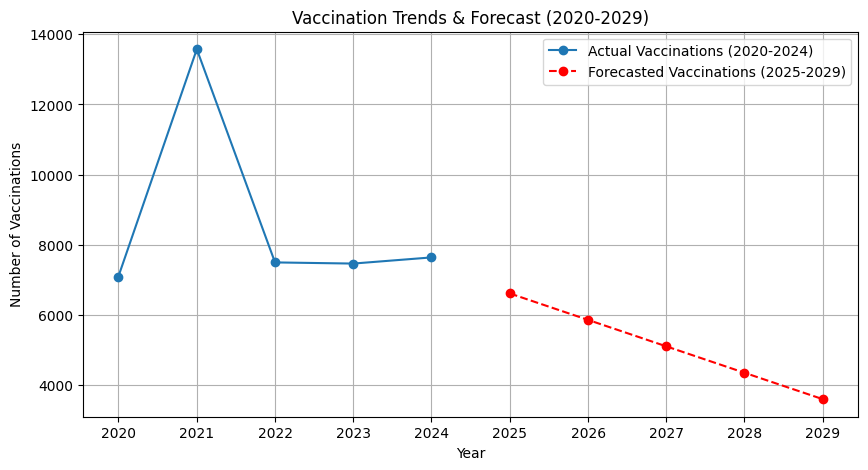

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np  # Ensure numpy is imported
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Reset index and drop the existing index column (if any)
df_immunization = df_immunization.reset_index(drop=True)

# Convert 'DATE' to datetime
df_immunization['DATE'] = pd.to_datetime(df_immunization['DATE'])

# Ensure timezone consistency (localize if naive, then remove timezone)
if df_immunization['DATE'].dt.tz is None:
    df_immunization['DATE'] = df_immunization['DATE'].dt.tz_localize('UTC')

df_immunization['DATE'] = df_immunization['DATE'].dt.tz_convert(None)

# Filter records from 2020 to 2024
start_date = pd.Timestamp("2020-01-01")
end_date = pd.Timestamp("2024-12-31")

vaccination_records = df_immunization[
    (df_immunization['DATE'] >= start_date) &
    (df_immunization['DATE'] <= end_date)
]

# Group by year and count the number of patients (vaccination trends)
vaccination_trends = vaccination_records.groupby(vaccination_records['DATE'].dt.year)['PATIENT'].count()

# Print summary
print(f"{len(vaccination_records)} vaccination records found between 2020-2024.")
print("Vaccination trends from 2020 to 2024:\n", vaccination_trends)

# ------------------- Forecasting Next 5 Years (2025-2029) -------------------

# Convert trends to time series format
years = vaccination_trends.index.astype(int)  # Extracting years as integers
values = vaccination_trends.values  # Vaccination counts

# Create a time series DataFrame with proper datetime index
ts_data = pd.DataFrame({'Year': years, 'Vaccinations': values})
ts_data['Date'] = pd.to_datetime(ts_data['Year'], format='%Y')
ts_data.set_index('Date', inplace=True)

# Apply Exponential Smoothing for forecasting
model = ExponentialSmoothing(ts_data['Vaccinations'], trend='add', seasonal=None, seasonal_periods=None)
fit_model = model.fit()

# Forecast for the next 5 years (2025-2029)
forecast_values = fit_model.forecast(steps=5)

# Ensure that the forecast years match the length of forecast values
future_years = np.arange(2025, 2025 + len(forecast_values))

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted_Vaccinations': forecast_values})
forecast_df['Date'] = pd.to_datetime(forecast_df['Year'], format='%Y')
forecast_df.set_index('Date', inplace=True)

# Plot past trends and future forecast
plt.figure(figsize=(10, 5))
plt.plot(ts_data.index, ts_data['Vaccinations'], marker='o', label='Actual Vaccinations (2020-2024)')
plt.plot(forecast_df.index, forecast_df['Forecasted_Vaccinations'], marker='o', linestyle='dashed', color='red', label='Forecasted Vaccinations (2025-2029)')
plt.xlabel("Year")
plt.ylabel("Number of Vaccinations")
plt.title("Vaccination Trends & Forecast (2020-2029)")
plt.legend()
plt.grid(True)
plt.show()


In [101]:
# Save the merged DataFrame to a CSV file
df_patient.to_csv("under_vaccinated_analysis.csv", index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [103]:
from google.colab import files

# Save the DataFrame to CSV
df_patient.to_csv("under_vaccinated_analysis.csv", index=False)

# Download the file
files.download("under_vaccinated_analysis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>